In [20]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in the data
crypto_df = pd.read_csv(Path('Data/crypto_data.csv'))

In [3]:
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the IsTrading column from the dataframe.
crypto_df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
(crypto_df['IsTrading']== True)

0        True
1        True
2        True
3        True
4        True
        ...  
1247     True
1248    False
1249    False
1250    False
1251    False
Name: IsTrading, Length: 1252, dtype: bool

In [7]:
# Filter data for just the ones that are traded 
crypto_trading_df = crypto_df.loc[(crypto_df['IsTrading']== True)]
crypto_trading_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [8]:
# Drop is trading column
crypto_trading_df = crypto_trading_df.drop(columns= ['IsTrading'])
crypto_trading_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.6+ KB


In [9]:
# Remove all rows that have at least one null value.
cleaned_cyrpto_df = crypto_trading_df.dropna(how= 'any', axis= 'rows')
cleaned_cyrpto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [10]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
cleaned_cyrpto_df['TotalCoinsMined'].value_counts()

0.000000e+00    152
1.000000e+09      7
1.000000e+08      7
2.500000e+07      2
2.000000e+07      2
               ... 
2.951355e+08      1
3.082571e+10      1
2.108935e+07      1
1.207310e+06      1
7.847417e+06      1
Name: TotalCoinsMined, Length: 520, dtype: int64

In [11]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
coin_name_df = cleaned_cyrpto_df['CoinName']
coin_name_df.head(10)

0              42 Coin
2              404Coin
4                  808
5            EliteCoin
7              Bitcoin
8             Ethereum
9             Litecoin
10                Dash
11              Monero
12    Ethereum Classic
Name: CoinName, dtype: object

In [12]:
# Drop coin name column
cleaned_cyrpto_df = cleaned_cyrpto_df.drop(columns= ['CoinName','Unnamed: 0'])
cleaned_cyrpto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        685 non-null    object 
 1   ProofType        685 non-null    object 
 2   TotalCoinsMined  685 non-null    float64
 3   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(3)
memory usage: 26.8+ KB


In [13]:
cleaned_cyrpto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
9,Scrypt,PoW,6.303924e+07,84000000
10,X11,PoW/PoS,9.031294e+06,22000000
11,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethash,PoW,1.133597e+08,210000000


In [14]:
# Tranform coins supply into number
cleaned_cyrpto_df['TotalCoinSupply'] = pd.to_numeric(cleaned_cyrpto_df['TotalCoinSupply'], errors= 'coerce')
cleaned_cyrpto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        685 non-null    object 
 1   ProofType        685 non-null    object 
 2   TotalCoinsMined  685 non-null    float64
 3   TotalCoinSupply  685 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.8+ KB


In [15]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data. To accomplish this task, use Pandas to create dummy variables
cleaned_cyrpto_df['Algorithm'].value_counts().count()


80

In [16]:
cleaned_cyrpto_df['ProofType'].value_counts().count()

27

In [17]:
# Get dummies to create new df
encoded_crypto_df = pd.get_dummies(cleaned_cyrpto_df, columns=['Algorithm', 'ProofType'])
encoded_crypto_df.shape


(685, 109)

In [18]:
encoded_crypto_df.head(2)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
encoded_crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Columns: 109 entries, TotalCoinsMined to ProofType_dPoW/PoW
dtypes: float64(2), uint8(107)
memory usage: 87.6 KB


In [23]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome & train the model
Scalar = StandardScaler()

# Fit data
X_scaled = Scalar.fit_transform(encoded_crypto_df)
X_scaled[:1]


array([[-0.10282804, -0.03823841, -0.03823596, -0.03823596, -0.03823596,
        -0.03823596, -0.05411338, -0.07664017, -0.03823596, -0.05411338,
        -0.05411338, -0.03823596, -0.03823596, -0.18216065, -0.05411338,
        -0.03823596, -0.03823596, -0.08574929, -0.03823596, -0.10160947,
        -0.06632365, -0.03823596, -0.03823596, -0.1642757 , -0.03823596,
        -0.03823596, -0.13908716, -0.03823596, -0.03823596, -0.07664017,
        -0.03823596, -0.03823596, -0.03823596, -0.03823596, -0.06632365,
        -0.03823596, -0.07664017, -0.08574929, -0.07664017, -0.03823596,
        -0.03823596, -0.12775161, -0.1335313 , -0.13908716, -0.03823596,
        -0.05411338, -0.03823596, -0.06632365, -0.1689039 , -0.03823596,
        -0.03823596, -0.03823596, -0.07664017, -0.17342199, -0.33468341,
        -0.03823596, -0.08574929, -0.06632365, -0.05411338, -0.03823596,
         1.42042992, -0.06632365, -0.03823596, -0.03823596, -0.06632365,
        -0.06632365, -0.03823596, -0.03823596, -0.0

In [49]:
# Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance. 
# For this project, preserve 90% of the explained variance in dimensionality reduction. 
pca = PCA(n_components=.90)

# fit the model to the PCA
X_pca = pca.fit_transform(X_scaled)



In [50]:
# Examine explain variance
pca.explained_variance_ratio_.cumsum()

array([0.02045753, 0.03972992, 0.0581708 , 0.07654625, 0.0949217 ,
       0.11329715, 0.1316726 , 0.15004805, 0.16838809, 0.18474983,
       0.20044089, 0.21515624, 0.22969061, 0.24399553, 0.25788263,
       0.27075606, 0.28219857, 0.29359828, 0.30456605, 0.31515276,
       0.3250966 , 0.33453436, 0.34395392, 0.35330387, 0.36263554,
       0.37195051, 0.38124569, 0.39050743, 0.39974869, 0.4089869 ,
       0.41821886, 0.42744706, 0.43667526, 0.44590346, 0.45513077,
       0.46435136, 0.47357089, 0.48278556, 0.49200023, 0.5012149 ,
       0.51042537, 0.51963295, 0.5288391 , 0.53804313, 0.54724461,
       0.55644578, 0.56564638, 0.57484657, 0.58404398, 0.5932394 ,
       0.60243332, 0.61162105, 0.62080877, 0.62999649, 0.63918422,
       0.64837194, 0.65755967, 0.66674739, 0.67593512, 0.68512284,
       0.69431057, 0.70349829, 0.71268602, 0.72187374, 0.73106147,
       0.74024919, 0.74943692, 0.75862464, 0.76781236, 0.77700009,
       0.78618781, 0.79537554, 0.80456326, 0.81375099, 0.82293

In [46]:
# # Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance. 
# # For this project, preserve 90% of the explained variance in dimensionality reduction. 
# pca = PCA(n_components=3)

# # fit the model to the PCA
# X_pca = pca.fit_transform(X_scaled)


In [51]:
# # Examine explain variance
# pca.explained_variance_ratio_.cumsum()

In [52]:
# Run t-SNE (T-distributed Stochastic Neighbor Embedding)
tsne = TSNE()
tsne_features = tsne.fit_transform(X_pca)



In [53]:
# Check that dimensions have been reduced to two
tsne_features.shape

(685, 2)

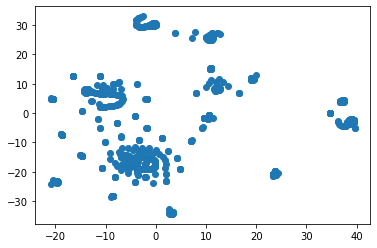

In [54]:
 # Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [55]:
# Create an elbow plot to identify the best number of clusters. 
# Use a for-loop to determine the inertia for each k between 1 through 10. 
# Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


C:\Users\brand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,67618.732137
1,2,66245.887942
2,3,64873.153451
3,4,64167.825928
4,5,62127.562369


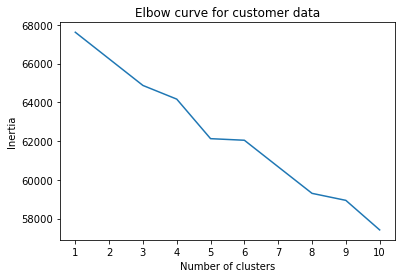

In [56]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()